In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os

In [37]:
input_file = 'Health2_data_final 2.csv'


def load_dataset(file_path):
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        print(f"Dataset '{file_path}' loaded successfully.\n")
        return df
    else:
        raise FileNotFoundError(f"The file '{file_path}' does not exist. Please check the file path.")

# Load the dataset
df = load_dataset(input_file)


Dataset 'Health2_data_final 2.csv' loaded successfully.



In [38]:
# Display the first five rows of the dataset
print("First five rows of the dataset:")
display(df.head())


First five rows of the dataset:


,sustainer,gender,client_state_rank,all_state_rank,client_zip_rank,all_zip_rank,age,account_id,gift_date,gift_min_t12m,...,drtv_t12m,other_t12m,no_channel_t12m,member_t12m,gift_min_lt,gift_max_lt,gift_avg_lt,gift_count_lt,promo_count_lt,cons_month_lt
0,1,1,51,42,1313,37495,62.0,150716,2024-05-13,0.12,...,0,0,0,0,0.12,5000.00,508.66,282,22,37
1,1,1,51,42,1313,37495,62.0,150716,2024-05-13,0.12,...,0,0,0,0,0.12,5000.00,508.66,282,22,37
2,1,0,51,42,1314,37499,67.0,229440,2020-11-25,0.02,...,0,0,0,0,0.02,208.34,92.36,179,13,22
3,1,0,51,42,1314,37499,67.0,229440,2020-03-26,0.02,...,0,0,0,0,0.02,208.34,91.71,178,13,22
4,1,0,51,42,1314,37499,67.0,229440,2021-01-26,0.02,...,0,0,0,0,0.02,208.34,93.40,182,14,22


In [39]:
# Define the list of columns you want to drop
columns_to_drop = ['drtv_t12m', 'no_channel_t12m', 'member_t12m', 'f2f_t12m','account_id', 'other_t12m','events_t12m', 'age','sustainer' ] 
# all values are single values 

print(f"Columns intended to drop: {columns_to_drop}\n")

existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_columns_to_drop:
    print(f"Columns to be dropped (exist in DataFrame): {existing_columns_to_drop}\n")
else:
    print("No specified columns found in the DataFrame to drop.\n")
df = df.drop(columns=existing_columns_to_drop)
print(f"Successfully dropped columns: {existing_columns_to_drop}\n")

print("Remaining columns after dropping:")
print(df.columns.tolist())


Columns intended to drop: ['drtv_t12m', 'no_channel_t12m', 'member_t12m', 'f2f_t12m', 'account_id', 'other_t12m', 'events_t12m', 'age', 'sustainer']

Columns to be dropped (exist in DataFrame): ['drtv_t12m', 'no_channel_t12m', 'member_t12m', 'f2f_t12m', 'account_id', 'other_t12m', 'events_t12m', 'age', 'sustainer']

Successfully dropped columns: ['drtv_t12m', 'no_channel_t12m', 'member_t12m', 'f2f_t12m', 'account_id', 'other_t12m', 'events_t12m', 'age', 'sustainer']

Remaining columns after dropping:
['gender', 'client_state_rank', 'all_state_rank', 'client_zip_rank', 'all_zip_rank', 'gift_date', 'gift_min_t12m', 'gift_max_t12m', 'gift_avg_t12m', 'gift_count_t12m', 'promo_count_t12m', 'cons_month_t12m', 'dm_t12m', 'tm_t12m', 'wm_t12m', 'digital_t12m', 'gift_min_lt', 'gift_max_lt', 'gift_avg_lt', 'gift_count_lt', 'promo_count_lt', 'cons_month_lt']


In [40]:

def handle_missing_values(df, strategy='fill', fill_value=0):
    if strategy == 'fill':
        df_filled = df.fillna(fill_value)
        print(f"Missing values filled with {fill_value}.\n")
        return df_filled
    elif strategy == 'drop':
        df_dropped = df.dropna()
        print("Rows with missing values have been dropped.\n")
        return df_dropped
    else:
        raise ValueError("Unsupported strategy for handling missing values.")

# Handle missing values by filling with 0
df = handle_missing_values(df, strategy='fill', fill_value=0)

Missing values filled with 0.



In [41]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns.tolist())


Numerical columns: ['gender', 'client_state_rank', 'all_state_rank', 'client_zip_rank', 'all_zip_rank', 'gift_min_t12m', 'gift_max_t12m', 'gift_avg_t12m', 'gift_count_t12m', 'promo_count_t12m', 'cons_month_t12m', 'dm_t12m', 'tm_t12m', 'wm_t12m', 'digital_t12m', 'gift_min_lt', 'gift_max_lt', 'gift_avg_lt', 'gift_count_lt', 'promo_count_lt', 'cons_month_lt']


Plotting histograms for numerical columns...



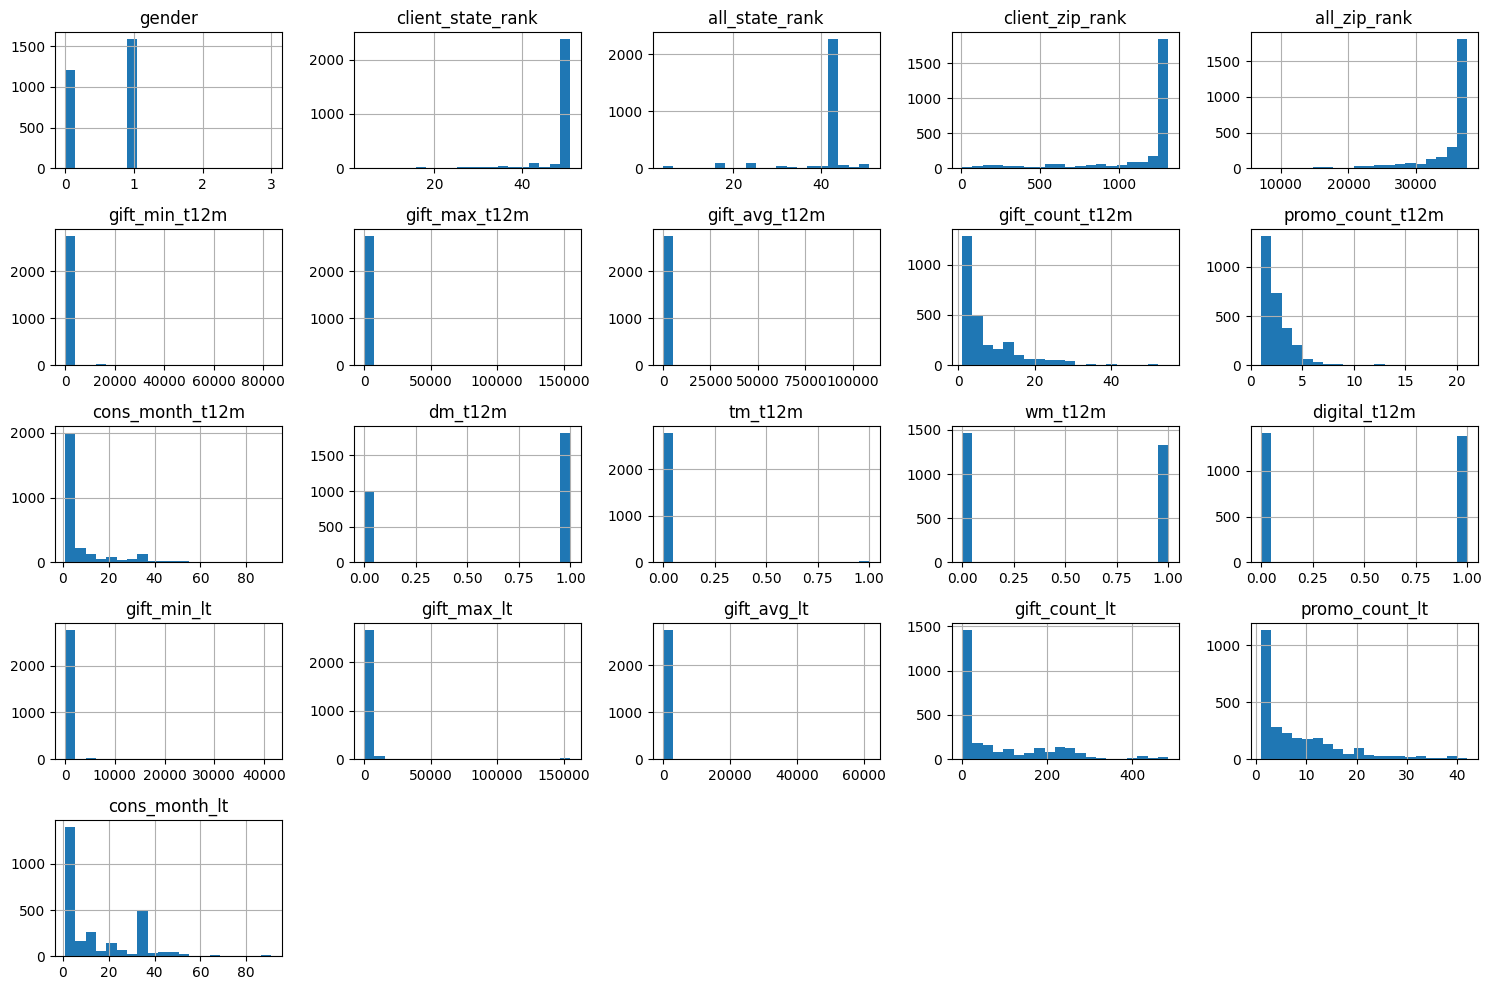

In [42]:
def plot_histograms(df, bins=20, figsize=(15, 10)):
    print("Plotting histograms for numerical columns...\n")
    df.hist(bins=bins, figsize=figsize)
    plt.tight_layout()
    plt.show()

# Plot histograms
plot_histograms(df)


Detecting Outliers We'll detect outliers using two methods:

Z-Score Method, Interquartile Range (IQR) Method

In [43]:
# Function to detect outliers using Z-Score
def detect_outliers_zscore(df, numerical_columns, threshold=3):
    outliers = {}
    print("Detecting outliers using Z-Score method\n")
    for column in numerical_columns:
        if df[column].nunique() > 1:
            z_scores = np.abs(stats.zscore(df[column]))
            outliers_indices = np.where(z_scores > threshold)[0]
            outliers[column] = outliers_indices
            print(f"Z-Score Outliers in '{column}': {len(outliers_indices)} detected")
        else:
            outliers[column] = np.array([])
            print(f"Z-Score Outliers in '{column}': 0 detected (constant column)")
    print("\n")
    return outliers

# Detect outliers using Z-Score
outliers_zscore = detect_outliers_zscore(df, numerical_columns)


Detecting outliers using Z-Score method

Z-Score Outliers in 'gender': 5 detected
Z-Score Outliers in 'client_state_rank': 96 detected
Z-Score Outliers in 'all_state_rank': 129 detected
Z-Score Outliers in 'client_zip_rank': 56 detected
Z-Score Outliers in 'all_zip_rank': 67 detected
Z-Score Outliers in 'gift_min_t12m': 27 detected
Z-Score Outliers in 'gift_max_t12m': 38 detected
Z-Score Outliers in 'gift_avg_t12m': 29 detected
Z-Score Outliers in 'gift_count_t12m': 48 detected
Z-Score Outliers in 'promo_count_t12m': 42 detected
Z-Score Outliers in 'cons_month_t12m': 59 detected
Z-Score Outliers in 'dm_t12m': 0 detected
Z-Score Outliers in 'tm_t12m': 24 detected
Z-Score Outliers in 'wm_t12m': 0 detected
Z-Score Outliers in 'digital_t12m': 0 detected
Z-Score Outliers in 'gift_min_lt': 6 detected
Z-Score Outliers in 'gift_max_lt': 46 detected
Z-Score Outliers in 'gift_avg_lt': 30 detected
Z-Score Outliers in 'gift_count_lt': 66 detected
Z-Score Outliers in 'promo_count_lt': 58 detected
Z

In [45]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, numerical_columns):
    outliers = {}
    print("Detecting outliers using IQR method...\n")
    for column in numerical_columns:
        Q1 = df[column].quantile(0.10)
        Q3 = df[column].quantile(0.90)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        condition = (df[column] < lower_bound) | (df[column] > upper_bound)
        outliers_indices = df[condition].index
        outliers[column] = outliers_indices
        print(f"IQR Outliers in '{column}': {len(outliers_indices)} detected")
    print("\n")
    return outliers

# Detect outliers using IQR
outliers_iqr = detect_outliers_iqr(df, numerical_columns)

Detecting outliers using IQR method...

IQR Outliers in 'gender': 0 detected
IQR Outliers in 'client_state_rank': 18 detected
IQR Outliers in 'all_state_rank': 0 detected
IQR Outliers in 'client_zip_rank': 0 detected
IQR Outliers in 'all_zip_rank': 0 detected
IQR Outliers in 'gift_min_t12m': 63 detected
IQR Outliers in 'gift_max_t12m': 74 detected
IQR Outliers in 'gift_avg_t12m': 57 detected
IQR Outliers in 'gift_count_t12m': 0 detected
IQR Outliers in 'promo_count_t12m': 27 detected
IQR Outliers in 'cons_month_t12m': 0 detected
IQR Outliers in 'dm_t12m': 0 detected
IQR Outliers in 'tm_t12m': 24 detected
IQR Outliers in 'wm_t12m': 0 detected
IQR Outliers in 'digital_t12m': 0 detected
IQR Outliers in 'gift_min_lt': 87 detected
IQR Outliers in 'gift_max_lt': 128 detected
IQR Outliers in 'gift_avg_lt': 78 detected
IQR Outliers in 'gift_count_lt': 0 detected
IQR Outliers in 'promo_count_lt': 0 detected
IQR Outliers in 'cons_month_lt': 0 detected




Removing Outliers Based on IQR We'll remove the detected outliers using the IQR method to obtain a dataset without outliers

In [46]:
def remove_outliers_iqr(df, numerical_columns):
    print("Removing outliers based on IQR method...\n")
    Q1 = df[numerical_columns].quantile(0.10)
    Q3 = df[numerical_columns].quantile(0.90)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    condition = ~((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)).any(axis=1)
    df_no_outliers = df[condition]
    print("Outliers removed.")
    print(f"Original dataset size: {df.shape[0]} rows")
    print(f"Dataset without outliers size: {df_no_outliers.shape[0]} rows\n")
    return df_no_outliers

# Remove outliers using IQR
df_without_outliers = remove_outliers_iqr(df, numerical_columns)


Removing outliers based on IQR method...

Outliers removed.
Original dataset size: 2801 rows
Dataset without outliers size: 2497 rows



In [47]:

def display_dataset_without_outliers(df):
    print("Displaying the dataset without outliers:\n")
    # Display the first 5 rows
    print("First five rows of the dataset without outliers:")
    display(df.head())
    
    print("\nSummary Statistics of Dataset Without Outliers:")
    display(df.describe())
    
    # Display the number of rows and columns
    print(f"\nDataset without outliers contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

display_dataset_without_outliers(df_without_outliers)


Displaying the dataset without outliers:

First five rows of the dataset without outliers:


,gender,client_state_rank,all_state_rank,client_zip_rank,all_zip_rank,gift_date,gift_min_t12m,gift_max_t12m,gift_avg_t12m,gift_count_t12m,...,dm_t12m,tm_t12m,wm_t12m,digital_t12m,gift_min_lt,gift_max_lt,gift_avg_lt,gift_count_lt,promo_count_lt,cons_month_lt
2,0,51,42,1314,37499,2020-11-25,0.02,208.33,93.34,10,...,1,0,1,0,0.02,208.34,92.36,179,13,22
3,0,51,42,1314,37499,2020-03-26,0.02,104.17,63.43,36,...,1,0,1,1,0.02,208.34,91.71,178,13,22
4,0,51,42,1314,37499,2021-01-26,0.02,208.33,108.34,11,...,1,0,1,1,0.02,208.34,93.40,182,14,22
5,0,51,42,1314,37499,2020-03-26,0.02,104.17,63.43,36,...,1,0,1,1,0.02,208.34,91.71,178,13,22
6,0,51,42,1314,37499,2021-03-25,0.02,208.33,136.46,8,...,1,0,1,1,0.02,208.34,94.65,184,14,22



Summary Statistics of Dataset Without Outliers:


,gender,client_state_rank,all_state_rank,client_zip_rank,all_zip_rank,gift_min_t12m,gift_max_t12m,gift_avg_t12m,gift_count_t12m,promo_count_t12m,...,dm_t12m,tm_t12m,wm_t12m,digital_t12m,gift_min_lt,gift_max_lt,gift_avg_lt,gift_count_lt,promo_count_lt,cons_month_lt
count,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,...,2497.000000,2497.0,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000,2497.000000
mean,0.554666,49.017621,39.931918,1116.680817,34790.450140,94.350440,269.599816,161.967669,7.121746,2.060873,...,0.642771,0.0,0.454145,0.498598,25.346171,573.296387,94.426376,80.127353,8.227473,14.399680
std,0.509048,5.653851,6.801337,330.306640,4709.763514,189.525720,483.259414,277.528444,7.787260,1.455640,...,0.479279,0.0,0.497993,0.500098,27.680205,1027.142658,120.195180,103.884250,8.525386,17.435379
min,0.000000,15.000000,6.000000,4.000000,7090.000000,0.020000,0.100000,0.100000,1.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,0.020000,0.100000,0.100000,1.000000,1.000000,1.000000
25%,0.000000,51.000000,42.000000,1094.000000,34391.000000,20.000000,25.000000,25.000000,2.000000,1.000000,...,0.000000,0.0,0.000000,0.000000,10.000000,30.000000,25.000000,4.000000,2.000000,1.000000
50%,1.000000,51.000000,42.000000,1281.000000,37025.000000,25.000000,75.000000,50.000000,4.000000,2.000000,...,1.000000,0.0,0.000000,0.000000,15.000000,100.000000,50.000000,20.000000,5.000000,5.000000
75%,1.000000,51.000000,42.000000,1313.000000,37495.000000,83.339996,250.000000,125.360000,10.000000,3.000000,...,1.000000,0.0,1.000000,1.000000,25.000000,500.040010,102.370000,156.000000,12.000000,26.000000
max,3.000000,51.000000,51.000000,1314.000000,37499.000000,1500.000000,4050.000000,2275.000000,55.000000,13.000000,...,1.000000,0.0,1.000000,1.000000,209.000000,5000.000000,924.440000,484.000000,42.000000,91.000000



Dataset without outliers contains 2497 rows and 22 columns.



In [48]:
def save_dataset_without_outliers(df, output_path):
    try:
        df.to_csv(output_path, index=False)
        print(f"Dataset without outliers saved to '{output_path}'.\n")
    except Exception as e:
        print(f"Error saving file: {e}\n")


output_file = 'Health2data_without_outliers.csv'

# Save the cleaned dataset
save_dataset_without_outliers(df_without_outliers, output_file)


Dataset without outliers saved to 'Health2data_without_outliers.csv'.

